#Introduction

The primary goal of this initiative is to enhance the profitability of easyMoney's existing customer base. As a seasoned multi-channel platform specializing in financial products, easyMoney has amassed over four years of experience in the market. Our strategy revolves around leveraging insights derived from the "customers," "products," and "sales" datasets.

Through meticulous analysis we've pinpointed the top-selling products along with those boasting the highest net margins. Armed with this information, we're poised to identify the products most likely to drive revenue growth, enabling us to tailor our sales efforts with precision.

Take, for instance, the "Pension plan" product. While it may not have the highest total sales volume, its impressive net margin suggests substantial profit potential. Thus, it emerges as a pivotal product for our upselling endeavors.

Let's delve into the datasets:

Customers Dataset:

    customer_id: Unique identifier for each customer.
    country_id: Acronym representing the customer's country.
    region_code: Numerical identifier denoting the region.
    gender: Gender of the client (H for female, V for male).
    age: Age of the client.
    salary: Client's income.
    entry_date: Date of customer onboarding.
    entry_channel: Channel through which the customer joined easyMoney.
    active_customer: Indicator of customer activity (1 for active, 0 for inactive).
    segment: Customer segment classification (top, individuals, university students).
    product ownership indicators: Various flags indicating whether the customer possesses specific products.

Sales Dataset:

    sale_id: Unique identifier for each sale.
    customer_id: Unique identifier for each customer.
    month_sale: Month of the most recent sale to each customer.
    product_id: Unique identifier for each product.
    net_margin: Net margin associated with each sale.

Products Dataset:

    product_id: Unique identifier for each product.
    product_name: Name of each product.
    family_product: Product family categorization.

By integrating these datasets and employing advanced analytics, we aim to optimize our offerings, strengthen customer engagement, and ultimately drive profitability across the board.




#Libraries


In [222]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
import sklearn.metrics as metrics
from sklearn.model_selection import GridSearchCV
import warnings
from datetime import date
warnings.filterwarnings("ignore")

#Import data


In [223]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [224]:
customers = pd.read_csv('/content/drive/MyDrive/TFM/customers.csv')
sales = pd.read_csv('/content/drive/MyDrive/TFM/sales.csv')
products = pd.read_csv('/content/drive/MyDrive/TFM/products.csv')

#Exploring customers dataset

In [225]:
#Header display
customers.head()

,customer_id,country_id,region_code,gender,age,salary,entry_date,entry_channel,active_customer,segment,...,long_term_deposit,em_account_pp,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount
0,15891,ES,28.0,H,59,NaN,2022-07,KAT,1.0,NaN,...,0,0,0,0,0,0,0,0,0,1
1,16203,ES,8.0,V,70,NaN,2022-12,KAT,1.0,02 - PARTICULARES,...,0,0,0,0,0,0,0,0,0,1
2,16502,ES,28.0,H,58,NaN,2022-09,KHN,1.0,02 - PARTICULARES,...,0,0,0,0,0,0,1,0,0,1
3,17457,ES,28.0,H,53,25601.44,2021-09,KAT,1.0,02 - PARTICULARES,...,1,0,0,0,0,0,0,1,0,1
4,17970,ES,28.0,V,75,NaN,2019-04,KAT,1.0,02 - PARTICULARES,...,0,0,0,0,1,1,1,1,0,0


In [226]:
#Customers table columns
customers.columns

Index(['customer_id', 'country_id', 'region_code', 'gender', 'age', 'salary',
       'entry_date', 'entry_channel', 'active_customer', 'segment',
       'short_term_deposit', 'loans', 'mortgage', 'funds', 'securities',
       'long_term_deposit', 'em_account_pp', 'credit_card', 'payroll',
       'pension_plan', 'payroll_account', 'emc_account', 'debit_card',
       'em_account_p', 'em_acount'],
      dtype='object')

In [227]:
customers.shape

(151493, 25)

In [228]:
def column_report(df_x):
    a = pd.DataFrame(df_x.dtypes, columns=['dtype'])
    b = pd.DataFrame(df_x.isna().sum(), columns=['nulls'])
    b['%nulls'] = round(100 * b['nulls'] / df_x.shape[0], 2)
    c = df_x.describe(include='all').transpose()
    return a.join(b).join(c).sort_values(by=['dtype', 'nulls'])

report = column_report(customers)
pd.set_option('display.max_rows', 1000)
report

,dtype,nulls,%nulls,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customer_id,int64,0,0.00,151493.0,NaN,NaN,NaN,1377757.287987,169810.386089,15891.0,1338639.0,1427042.0,1481566.0,1553571.0
age,int64,0,0.00,151493.0,NaN,NaN,NaN,32.057494,13.481877,2.0,21.0,28.0,39.0,102.0
short_term_deposit,int64,0,0.00,151493.0,NaN,NaN,NaN,0.010977,0.104197,0.0,0.0,0.0,0.0,1.0
loans,int64,0,0.00,151493.0,NaN,NaN,NaN,0.000165,0.012845,0.0,0.0,0.0,0.0,1.0
mortgage,int64,0,0.00,151493.0,NaN,NaN,NaN,0.000099,0.00995,0.0,0.0,0.0,0.0,1.0
funds,int64,0,0.00,151493.0,NaN,NaN,NaN,0.007149,0.084248,0.0,0.0,0.0,0.0,1.0
securities,int64,0,0.00,151493.0,NaN,NaN,NaN,0.009327,0.096126,0.0,0.0,0.0,0.0,1.0
long_term_deposit,int64,0,0.00,151493.0,NaN,NaN,NaN,0.035355,0.184675,0.0,0.0,0.0,0.0,1.0
em_account_pp,int64,0,0.00,151493.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
credit_card,int64,0,0.00,151493.0,NaN,NaN,NaN,0.037513,0.190017,0.0,0.0,0.0,0.0,1.0


In [229]:
#Find duplicates
customers[customers.duplicated(keep = False)]

,customer_id,country_id,region_code,gender,age,salary,entry_date,entry_channel,active_customer,segment,...,long_term_deposit,em_account_pp,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount


In [230]:
customers_df = customers.copy()

#Exploring sales dataset

In [231]:
sales.head()

,sale_id,customer_id,month_sale,product_id,net_margin
0,6666,33620,2022-05,2335,238.225
1,6667,35063,2022-06,2335,406.300
2,6668,37299,2022-02,2335,319.925
3,6669,39997,2022-02,2335,377.975
4,6670,44012,2022-02,2335,420.075


In [232]:
sales.shape

(238574, 5)

In [233]:
def column_report(df_x):
    a = pd.DataFrame(df_x.dtypes, columns=['dtype'])
    b = pd.DataFrame(df_x.isna().sum(), columns=['nulls'])
    b['%nulls'] = round(100 * b['nulls'] / df_x.shape[0], 2)
    c = df_x.describe(include='all').transpose()
    return a.join(b).join(c).sort_values(by=['dtype', 'nulls'])

report = column_report(sales)
pd.set_option('display.max_rows', 1000)
report

,dtype,nulls,%nulls,count,unique,top,freq,mean,std,min,25%,50%,75%,max
sale_id,int64,0,0.0,238574.0,NaN,NaN,NaN,127341.838075,69566.038435,6666.0,67108.25,127381.5,187747.75,247438.0
customer_id,int64,0,0.0,238574.0,NaN,NaN,NaN,1364757.455272,174847.543371,15891.0,1302609.0,1410004.5,1476224.5,1553571.0
product_id,int64,0,0.0,238574.0,NaN,NaN,NaN,3948.267288,1631.613893,1119.0,2312.0,4657.0,4657.0,9001.0
net_margin,float64,0,0.0,238574.0,NaN,NaN,NaN,151.268246,433.360087,6.25,15.35,17.275,19.8,4616.6
month_sale,object,0,0.0,238574,16,2022-10,27578,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [234]:
sales.nunique()

sale_id        238574
customer_id    151493
month_sale         16
product_id         13
net_margin      25201
dtype: int64

In [235]:
sales[sales.duplicated(keep = False)]

,sale_id,customer_id,month_sale,product_id,net_margin


#Exploring products dataset

In [236]:
products

,product_id,product_name,family_product
0,4657,em_acount,account
1,3819,debit_card,payment_card
2,1364,pension_plan,pension_plan
3,2234,payroll,account
4,2235,payroll_account,account
5,8871,emc_account,account
6,2312,credit_card,payment_card
7,2335,short_term_deposit,investment
8,2336,long_term_deposit,investment
9,2673,securities,investment


In [237]:
def column_report(df_x):
    a = pd.DataFrame(df_x.dtypes, columns=['dtype'])
    b = pd.DataFrame(df_x.isna().sum(), columns=['nulls'])
    b['%nulls'] = round(100 * b['nulls'] / df_x.shape[0], 2)
    c = df_x.describe(include='all').transpose()
    return a.join(b).join(c).sort_values(by=['dtype', 'nulls'])

report = column_report(products)
pd.set_option('display.max_rows', 1000)
report

,dtype,nulls,%nulls,count,unique,top,freq,mean,std,min,25%,50%,75%,max
product_id,int64,0,0.0,13.0,NaN,NaN,NaN,3614.538462,2564.251438,1119.0,2235.0,2336.0,4033.0,9001.0
product_name,object,0,0.0,13,13,em_acount,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
family_product,object,0,0.0,13,5,account,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [238]:
products.nunique()

product_id        13
product_name      13
family_product     5
dtype: int64

In [239]:
products[products.duplicated(keep = False)]

,product_id,product_name,family_product


#Define perimeters


In [240]:
#List of clients who have purchased pension_plan in the sales dataset
df_pension_plan = sales[sales['product_id']==1364]

#List with buyers of the df_pension_plan
buyers = list(df_pension_plan['customer_id'])
buyers[:5]

[32376, 33205, 35849, 36148, 41264]

In [241]:
df_pension_plan.head(5)

,sale_id,customer_id,month_sale,product_id,net_margin
34242,41362,32376,2022-03,1364,1571.450
34243,41363,33205,2022-11,1364,1732.725
34244,41364,35849,2023-02,1364,1562.200
34245,41365,36148,2022-06,1364,865.375
34246,41366,41264,2023-04,1364,2174.075


In [242]:
#Creation of the target variable
#Copy
df = customers_df.copy()

#We create the 'Target' column where 1 = have a pension plan and 0 = no pension_plan
df['tiene_pension_plan'] = df['customer_id'].apply(lambda id: 1 if id in buyers
                                                   else 0)

df = df[(df['tiene_pension_plan']==1) | (df['pension_plan']==0)]
df

,customer_id,country_id,region_code,gender,age,salary,entry_date,entry_channel,active_customer,segment,...,em_account_pp,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount,tiene_pension_plan
0,15891,ES,28.0,H,59,NaN,2022-07,KAT,1.0,NaN,...,0,0,0,0,0,0,0,0,1,0
1,16203,ES,8.0,V,70,NaN,2022-12,KAT,1.0,02 - PARTICULARES,...,0,0,0,0,0,0,0,0,1,0
2,16502,ES,28.0,H,58,NaN,2022-09,KHN,1.0,02 - PARTICULARES,...,0,0,0,0,0,1,0,0,1,0
3,17457,ES,28.0,H,53,25601.44,2021-09,KAT,1.0,02 - PARTICULARES,...,0,0,0,0,0,0,1,0,1,0
5,17980,ES,28.0,V,77,70615.45,2022-05,KFA,1.0,01 - TOP,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151488,1553456,ES,28.0,H,32,NaN,2023-05,NaN,1.0,NaN,...,0,0,0,0,0,0,0,0,1,0
151489,1553541,ES,49.0,V,54,NaN,2023-05,NaN,1.0,NaN,...,0,0,0,0,0,0,0,0,1,0
151490,1553559,ES,8.0,H,43,NaN,2023-05,NaN,1.0,NaN,...,0,0,0,0,0,0,0,0,1,0
151491,1553565,ES,45.0,H,68,NaN,2023-05,NaN,0.0,NaN,...,0,0,0,0,0,0,0,0,1,0


In [243]:
df.drop('pension_plan', axis=1, inplace=True)

In [244]:
#Check number of variables
df['tiene_pension_plan'].nunique()

2

#Treating NULLs

In [245]:
df.isnull().sum()

customer_id               0
country_id                0
region_code              47
gender                    2
age                       0
salary                73927
entry_date                0
entry_channel         62385
active_customer           0
segment               62626
short_term_deposit        0
loans                     0
mortgage                  0
funds                     0
securities                0
long_term_deposit         0
em_account_pp             0
credit_card               0
payroll                   0
payroll_account           0
emc_account               0
debit_card                0
em_account_p              0
em_acount                 0
tiene_pension_plan        0
dtype: int64

Delete variables

In [246]:
#Elimination of the 'salary' column due to the large percentage of nulls.
df.drop(columns='salary', axis=1, inplace=True)

Delete rows with nulls

In [247]:
df = df.dropna()

In [248]:
df.isnull().sum()

customer_id           0
country_id            0
region_code           0
gender                0
age                   0
entry_date            0
entry_channel         0
active_customer       0
segment               0
short_term_deposit    0
loans                 0
mortgage              0
funds                 0
securities            0
long_term_deposit     0
em_account_pp         0
credit_card           0
payroll               0
payroll_account       0
emc_account           0
debit_card            0
em_account_p          0
em_acount             0
tiene_pension_plan    0
dtype: int64

In [249]:
df.head()

,customer_id,country_id,region_code,gender,age,entry_date,entry_channel,active_customer,segment,short_term_deposit,...,long_term_deposit,em_account_pp,credit_card,payroll,payroll_account,emc_account,debit_card,em_account_p,em_acount,tiene_pension_plan
1,16203,ES,8.0,V,70,2022-12,KAT,1.0,02 - PARTICULARES,0,...,0,0,0,0,0,0,0,0,1,0
2,16502,ES,28.0,H,58,2022-09,KHN,1.0,02 - PARTICULARES,0,...,0,0,0,0,0,1,0,0,1,0
3,17457,ES,28.0,H,53,2021-09,KAT,1.0,02 - PARTICULARES,0,...,1,0,0,0,0,0,1,0,1,0
5,17980,ES,28.0,V,77,2022-05,KFA,1.0,01 - TOP,0,...,1,0,0,0,0,0,0,0,0,0
6,18146,ES,28.0,V,65,2023-02,KFA,1.0,01 - TOP,0,...,0,0,0,0,0,1,0,0,0,0


In [250]:
df.nunique()

customer_id           85880
country_id                1
region_code              52
gender                    2
age                      98
entry_date               52
entry_channel            42
active_customer           2
segment                   3
short_term_deposit        2
loans                     2
mortgage                  2
funds                     2
securities                2
long_term_deposit         2
em_account_pp             1
credit_card               2
payroll                   2
payroll_account           2
emc_account               2
debit_card                2
em_account_p              2
em_acount                 2
tiene_pension_plan        2
dtype: int64

#Elimination of low variance variables

In [251]:
print('The following variables have been removed:')
for col in df.columns:
    # Calculates the relative frequency of the most common value in the column
    most_frequent_ratio = df[col].value_counts(normalize=True).max()
    # If the relative frequency of the most common value is greater than 0.99, remove the column
    if most_frequent_ratio > 0.99:
        df = df.drop(col, axis=1)
        print(col)

The following variables have been removed:
country_id
loans
mortgage
em_account_pp
em_account_p


#Correlation

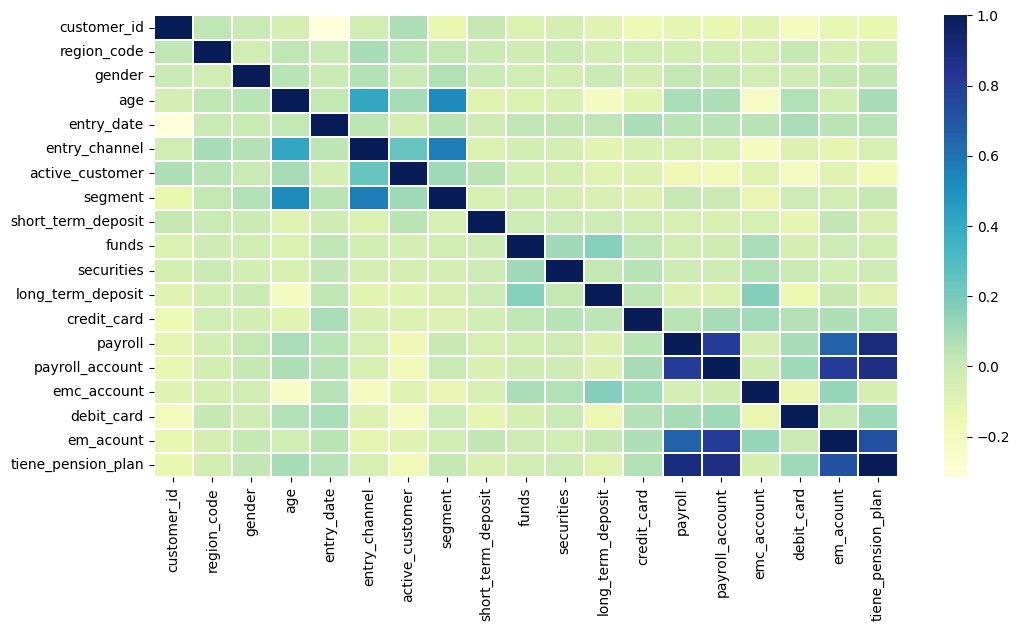

In [252]:
plt.figure(figsize=(12, 6))
df.drop(['customer_id'], axis=1)
corr = df.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,
                 linewidths=.2, cmap="YlGnBu")

We identified that payroll and payroll account are closely related. I'll try to delete them.

In [253]:
df.drop(columns=['payroll', 'payroll_account'], axis=1, inplace=True)

#'region_code' variable

In [254]:
#Total occurrences of each value
df["region_code"].value_counts()

region_code
28.0    24130
8.0      6813
46.0     5080
41.0     4118
3.0      3201
30.0     2989
29.0     2622
15.0     2291
11.0     1945
35.0     1836
50.0     1662
47.0     1658
33.0     1649
36.0     1615
18.0     1493
45.0     1465
39.0     1310
14.0     1178
37.0     1148
7.0      1048
48.0      959
6.0       946
12.0      923
2.0       873
13.0      866
43.0      825
38.0      788
21.0      765
9.0       732
24.0      720
4.0       677
10.0      661
23.0      646
19.0      495
17.0      488
20.0      475
26.0      465
32.0      460
27.0      440
31.0      436
25.0      386
49.0      376
34.0      348
1.0       347
5.0       313
16.0      313
40.0      313
22.0      237
42.0      132
44.0      112
51.0       67
52.0       45
Name: count, dtype: int64

In [255]:
#Frequency of values in region_code
df_region = df['region_code'].value_counts(normalize=True).to_frame().reset_index()
df_region.columns = ['region_code', 'frecuencia']
df_region

,region_code,frecuencia
0,28.0,0.280973
1,8.0,0.079332
2,46.0,0.059152
3,41.0,0.047951
4,3.0,0.037273
5,30.0,0.034804
6,29.0,0.030531
7,15.0,0.026677
8,11.0,0.022648
9,35.0,0.021379


In [256]:
# add a column with the accumulated frequency
df_region['frecuencia_cumul'] = df_region['frecuencia'].cumsum()

In [257]:
# round and multiply by 100
df_region['frecuencia'] = np.round(df_region['frecuencia'].mul(100), 1)
df_region['frecuencia_cumul'] = np.round(df_region['frecuencia_cumul'].mul(100), 1)
df_region


,region_code,frecuencia,frecuencia_cumul
0,28.0,28.1,28.1
1,8.0,7.9,36.0
2,46.0,5.9,41.9
3,41.0,4.8,46.7
4,3.0,3.7,50.5
5,30.0,3.5,53.9
6,29.0,3.1,57.0
7,15.0,2.7,59.7
8,11.0,2.3,61.9
9,35.0,2.1,64.1


In [258]:
# we filter the most frequent region_code (90% of the total)
top_region_code = list(df_region[df_region['frecuencia_cumul']<90]['region_code'])
top_region_code

[28.0,
 8.0,
 46.0,
 41.0,
 3.0,
 30.0,
 29.0,
 15.0,
 11.0,
 35.0,
 50.0,
 47.0,
 33.0,
 36.0,
 18.0,
 45.0,
 39.0,
 14.0,
 37.0,
 7.0,
 48.0,
 6.0,
 12.0,
 2.0,
 13.0,
 43.0,
 38.0,
 21.0,
 9.0]

In [259]:
# Affect the value of the category with a lambda function
# if the value is not one of the best categories, it will be called 'other'
df['region_code'] = df['region_code'].apply(lambda x:
                                              x if x in top_region_code
                                              else 'otra')


#'entry_channel' variable

In [260]:
#Total occurrences of each value
df["entry_channel"].value_counts()

entry_channel
KHM    15885
KFC    13949
KHE    12157
KHN    10026
KHK     9710
KHQ     8868
KAT     7333
RED     2395
KHL     2200
KFA     1838
KHO      772
KHF      263
KHD      201
KAZ       88
KHC       77
KBG       27
KHP       12
013       12
007       12
KAG        9
KAS        6
KBZ        5
KAA        4
KEH        3
KAF        3
KFD        3
KAK        2
KAQ        2
KAB        2
KAE        2
KCB        2
KAY        2
KCK        1
KCH        1
KCC        1
KCI        1
KAM        1
KAJ        1
KGX        1
KDT        1
KBW        1
KDR        1
Name: count, dtype: int64

In [261]:
#Frequency of values in entry_channel
df_entry_channel = df['entry_channel'].value_counts(normalize=True).to_frame().reset_index()
df_entry_channel.columns = ['entry_channel', 'frecuencia']
df_entry_channel

,entry_channel,frecuencia
0,KHM,0.184967
1,KFC,0.162424
2,KHE,0.141558
3,KHN,0.116744
4,KHK,0.113065
5,KHQ,0.103260
6,KAT,0.085387
7,RED,0.027888
8,KHL,0.025617
9,KFA,0.021402


In [262]:
#  add a column with the accumulated frequency
df_entry_channel['frecuencia_cumul'] = df_entry_channel['frecuencia'].cumsum()

In [263]:
# round and multiply by 100
df_entry_channel['frecuencia'] = np.round(df_entry_channel['frecuencia'].mul(100), 1)
df_entry_channel['frecuencia_cumul'] = np.round(df_entry_channel['frecuencia_cumul'].mul(100), 1)
df_entry_channel

,entry_channel,frecuencia,frecuencia_cumul
0,KHM,18.5,18.5
1,KFC,16.2,34.7
2,KHE,14.2,48.9
3,KHN,11.7,60.6
4,KHK,11.3,71.9
5,KHQ,10.3,82.2
6,KAT,8.5,90.7
7,RED,2.8,93.5
8,KHL,2.6,96.1
9,KFA,2.1,98.2


In [264]:
# List with the most frequent entry_channels
top_entry_channel = list(df_entry_channel[df_entry_channel['frecuencia_cumul'] < 91]['entry_channel'])
top_entry_channel

['KHM', 'KFC', 'KHE', 'KHN', 'KHK', 'KHQ', 'KAT']

In [265]:
# Affect the value of the category with a lambda function
# if the value is not one of the 12 best categories, it will be called 'other'
df['entry_channel'] = df['entry_channel'].apply(lambda x:
                                              x if x in top_entry_channel
                                              else 'otra')

In [266]:
df['entry_channel'].value_counts()

entry_channel
KHM     15885
KFC     13949
KHE     12157
KHN     10026
KHK      9710
KHQ      8868
otra     7952
KAT      7333
Name: count, dtype: int64

In [267]:
df.shape

(85880, 17)

#Sections in 'age' variable

In [268]:
#Creation of sections
age_tram = {1:[0,20], 2:[20,40], 3:[40,60], 4:[60,120]}
df['age_tram'] = 0
for div, values in age_tram.items():
    df['age_tram'] = np.where( (df['age'] > values[0]) & (df['age'] <= values[1]), div, df['age_tram'] )

In [269]:
#We eliminate the 'age' variable
df.drop(columns=['age'], axis=1, inplace=True)

#Numbers to integers

In [270]:
df['active_customer'] = df['active_customer'].astype(int)

#Creation of seniority variable





In [271]:
#Seniority of clients in days
df['entry_date'] = pd.to_datetime(customers_df['entry_date'])
df['antiguedad'] = pd.Timestamp(date.today()) - df['entry_date']
df['antiguedad'] = df['antiguedad'].apply(lambda x: x.days)
df = df.drop('entry_date', axis=1)

In [272]:
df.head()

,customer_id,region_code,gender,entry_channel,active_customer,segment,short_term_deposit,funds,securities,long_term_deposit,credit_card,emc_account,debit_card,em_acount,tiene_pension_plan,age_tram,antiguedad
1,16203,8.0,V,KAT,1,02 - PARTICULARES,0,0,0,0,0,0,0,1,0,4,503
2,16502,28.0,H,KHN,1,02 - PARTICULARES,0,0,0,0,0,1,0,1,0,3,594
3,17457,28.0,H,KAT,1,02 - PARTICULARES,0,0,0,1,0,0,1,1,0,3,959
5,17980,28.0,V,otra,1,01 - TOP,0,1,0,1,0,0,0,0,0,4,717
6,18146,28.0,V,otra,1,01 - TOP,0,0,0,0,0,1,0,0,0,4,441


#EDA

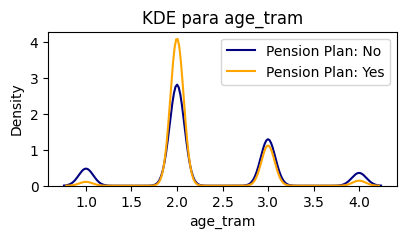

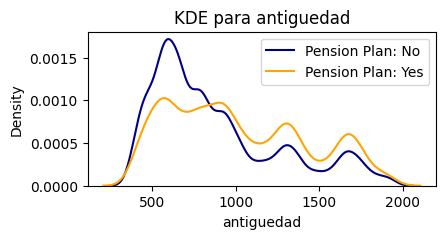

In [273]:
#Visualization of ages compared to the target
def kdeplot(feature):
    plt.figure(figsize=(4.5, 2))
    plt.title("KDE para {}".format(feature))
    ax0 = sns.kdeplot(df[df['tiene_pension_plan'] == 0][feature].dropna(), color= 'navy',legend=True ,label= 'Pension Plan: No')
    ax1 = sns.kdeplot(df[df['tiene_pension_plan'] == 1][feature].dropna(), color= 'orange', legend=True,label= 'Pension Plan: Yes')
    plt.legend()
kdeplot('age_tram')
kdeplot('antiguedad')

There's not a significant difference between customers with or without the pension plan based on age. However, seniority clients are more likely to acquire it.

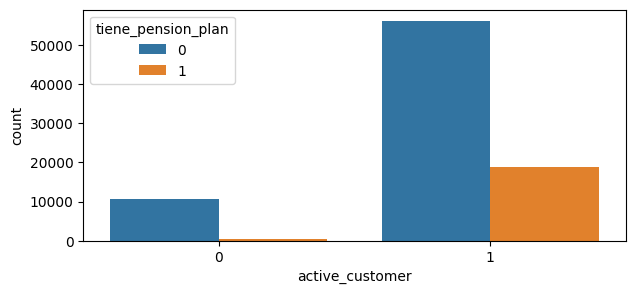

In [274]:
#Visualization of the segments compared to the target
plt.rcParams['figure.figsize'] = 7, 3
sns.countplot(data=df, x='active_customer', hue='tiene_pension_plan')
plt.show()

Inactive clients have practically no pension plan.

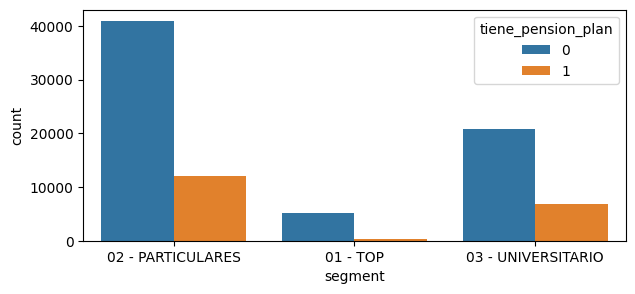

In [275]:
#Visualization of the segments compared to the target
plt.rcParams['figure.figsize'] = 7, 3
sns.countplot(data=df, x='segment', hue='tiene_pension_plan')
plt.show()

Regarding the segment, the majority of clients with a pension plan are particulares or university students.

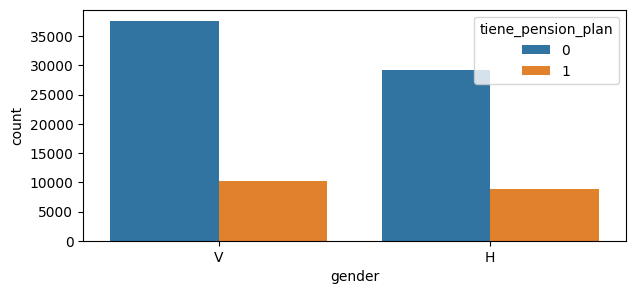

In [276]:
#Visualization of the gender compared to the target
plt.rcParams['figure.figsize'] = 7, 3
sns.countplot(data=df, x='gender', hue='tiene_pension_plan')
plt.show()

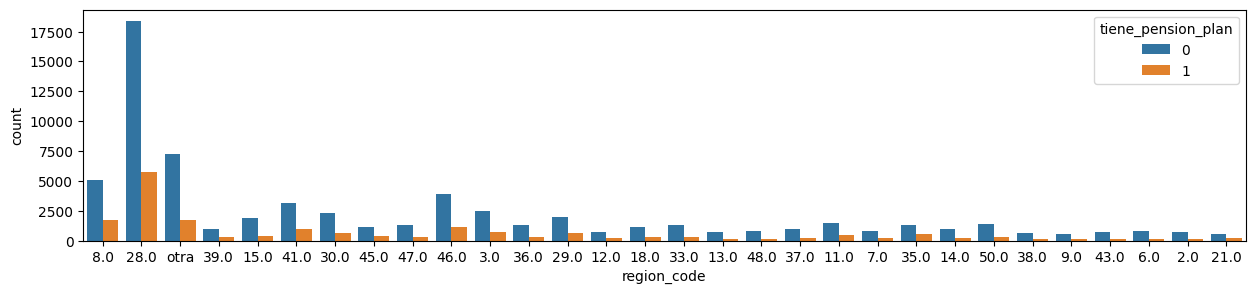

In [277]:
#Visualization of region code compared to the target
plt.rcParams['figure.figsize'] = 15, 3
sns.countplot(data=df, x='region_code', hue='tiene_pension_plan')
plt.show()

Most of the clients with the target have region code 28.

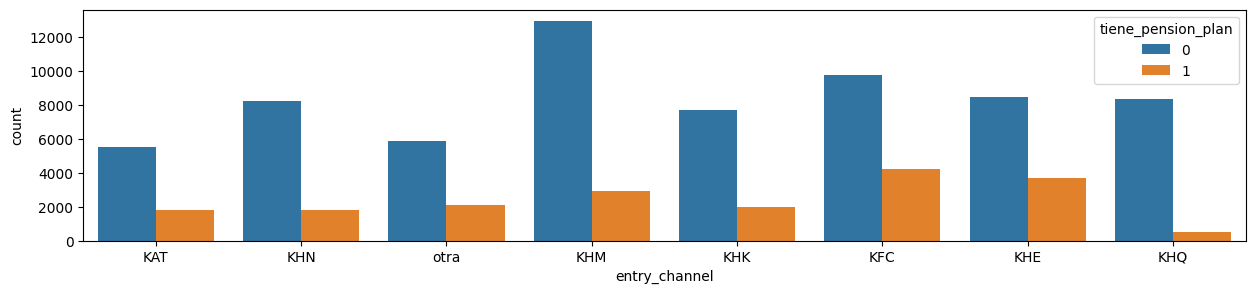

In [278]:
#Display of entry_channel compared to target
plt.rcParams['figure.figsize'] = 15, 3
sns.countplot(data=df, x='entry_channel', hue='tiene_pension_plan')
plt.show()

The entry_channel seems balanced, there is a slight majority in the entry_channel KFC and KHE with the target.

#Preprocessing

In [279]:
#One hot encoding
df=pd.get_dummies(df)
df.shape

(85880, 56)

#Target

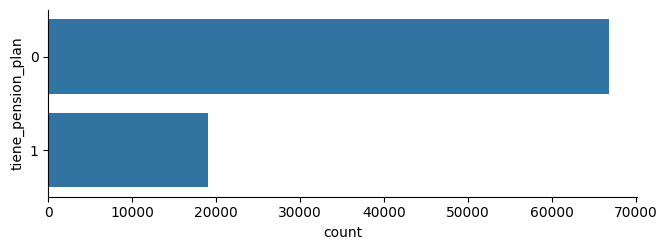

In [280]:
ax = sns.catplot(y="tiene_pension_plan", kind="count", data=df, height=2.6, aspect=2.5, orient='h')

In [281]:
yes = round((df.loc[df['tiene_pension_plan']== 1,'tiene_pension_plan'].count()/df['tiene_pension_plan'].count())*100)
no = round((df.loc[df['tiene_pension_plan']== 0,'tiene_pension_plan'].count()/df['tiene_pension_plan'].count())*100)

In [282]:
print('The percentage of clients with pension_plan "Y" is {}% and the class "N" is {} %'.format(yes,no))

The percentage of clients with pension_plan "Y" is 22% and the class "N" is 78 %


In [283]:
df_positivos = df[df['tiene_pension_plan']==1]
len(df_positivos)

19020

In [284]:
df_negativos = df[df['tiene_pension_plan']==0]
len(df_negativos)

66860

In [285]:
from sklearn.utils import resample

In [286]:
df_negativos_resampled = resample(df_negativos,
                                  replace=False,  # Sampling without replacement to avoid duplicates
                                  n_samples=len(df_positivos),  # Equating the number of samples to the minority class
                                  random_state=42)  # Set a seed for reproducibility

# Combine balanced data
df_balanced = pd.concat([df_positivos, df_negativos_resampled])

# Check class balance
print(df_balanced['tiene_pension_plan'].value_counts())

tiene_pension_plan
1    19020
0    19020
Name: count, dtype: int64


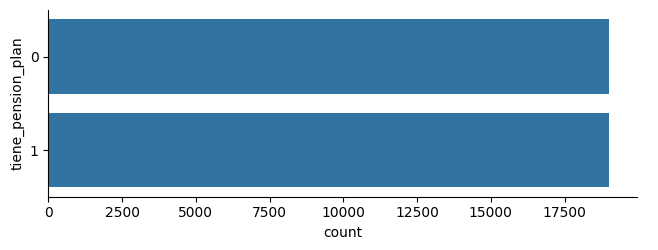

In [287]:
ax = sns.catplot(y="tiene_pension_plan", kind="count", data=df_balanced, height=2.6, aspect=2.5, orient='h')

In [288]:
df_balanced.shape

(38040, 56)

#Prediction set

In [289]:
df_predict = df[df['tiene_pension_plan']==0]
df_predict.shape

(66860, 56)

In [290]:
df_predict.head()

,customer_id,active_customer,short_term_deposit,funds,securities,long_term_deposit,credit_card,emc_account,debit_card,em_acount,...,entry_channel_KFC,entry_channel_KHE,entry_channel_KHK,entry_channel_KHM,entry_channel_KHN,entry_channel_KHQ,entry_channel_otra,segment_01 - TOP,segment_02 - PARTICULARES,segment_03 - UNIVERSITARIO
1,16203,1,0,0,0,0,0,0,0,1,...,False,False,False,False,False,False,False,False,True,False
2,16502,1,0,0,0,0,0,1,0,1,...,False,False,False,False,True,False,False,False,True,False
3,17457,1,0,0,0,1,0,0,1,1,...,False,False,False,False,False,False,False,False,True,False
5,17980,1,0,1,0,1,0,0,0,0,...,False,False,False,False,False,False,True,True,False,False
6,18146,1,0,0,0,0,0,1,0,0,...,False,False,False,False,False,False,True,True,False,False


#'Customer_id'



In [291]:
#Save the variable 'customer_id' for the prediction dataset
customer_id = df_predict['customer_id']

In [292]:
#Removal of 'customer_id' variable in both datasets
df_balanced.drop('customer_id', axis=1, inplace=True)
df_predict.drop('customer_id', axis=1, inplace=True)

#Feature importance

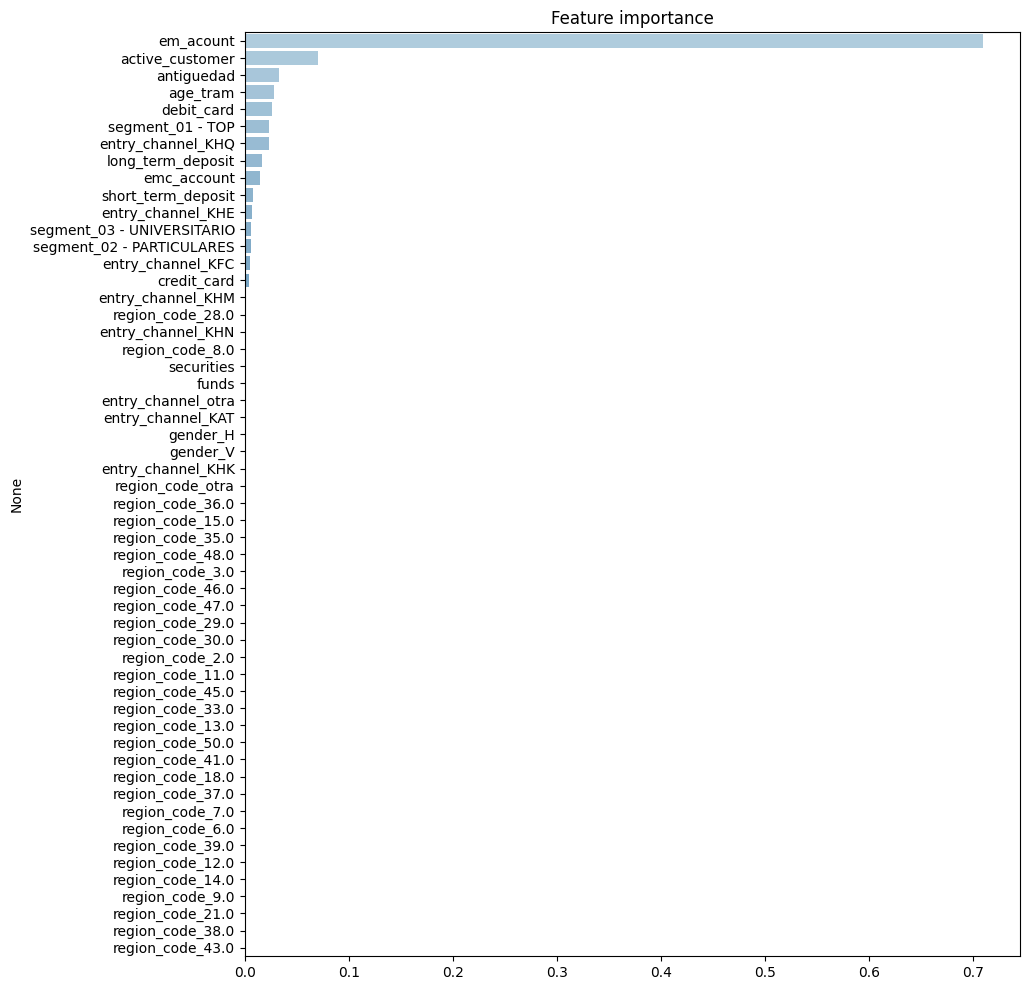

In [293]:
params = {'random_state': 0, 'n_jobs': 4, 'n_estimators': 5000, 'max_depth': 8}
X = df_balanced.drop('tiene_pension_plan', axis=1)
y = df_balanced['tiene_pension_plan']
clf = RandomForestClassifier(**params)
clf = clf.fit(X, y)
# We plot the important features
imp = pd.Series(data=clf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,12))
plt.title("Feature importance")
ax = sns.barplot(y=imp.index, x=imp.values, palette="Blues_d", orient='h')
plt.show()

Relevant Product: The EM account stands out as a strong predictor for the objective. This product appears to be strongly associated with a higher likelihood of acquiring the pension plan.

Customer Seniority is another important predictor for the objective. This suggests that customers with longer seniority are more likely to acquire the pension plan, reflecting a relationship of trust and loyalty with easyMoney over time.

#Dataset preparation

In [294]:
df_balanced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38040 entries, 26 to 40280
Data columns (total 55 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   active_customer             38040 non-null  int64
 1   short_term_deposit          38040 non-null  int64
 2   funds                       38040 non-null  int64
 3   securities                  38040 non-null  int64
 4   long_term_deposit           38040 non-null  int64
 5   credit_card                 38040 non-null  int64
 6   emc_account                 38040 non-null  int64
 7   debit_card                  38040 non-null  int64
 8   em_acount                   38040 non-null  int64
 9   tiene_pension_plan          38040 non-null  int64
 10  age_tram                    38040 non-null  int64
 11  antiguedad                  38040 non-null  int64
 12  region_code_2.0             38040 non-null  bool 
 13  region_code_3.0             38040 non-null  bool 
 14  region_cod

In [295]:
target = df_balanced['tiene_pension_plan']

In [296]:
df_predict.info()

<class 'pandas.core.frame.DataFrame'>
Index: 66860 entries, 1 to 150000
Data columns (total 55 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   active_customer             66860 non-null  int64
 1   short_term_deposit          66860 non-null  int64
 2   funds                       66860 non-null  int64
 3   securities                  66860 non-null  int64
 4   long_term_deposit           66860 non-null  int64
 5   credit_card                 66860 non-null  int64
 6   emc_account                 66860 non-null  int64
 7   debit_card                  66860 non-null  int64
 8   em_acount                   66860 non-null  int64
 9   tiene_pension_plan          66860 non-null  int64
 10  age_tram                    66860 non-null  int64
 11  antiguedad                  66860 non-null  int64
 12  region_code_2.0             66860 non-null  bool 
 13  region_code_3.0             66860 non-null  bool 
 14  region_cod

In [297]:
df_balanced.nunique()

active_customer                2
short_term_deposit             2
funds                          2
securities                     2
long_term_deposit              2
credit_card                    2
emc_account                    2
debit_card                     2
em_acount                      2
tiene_pension_plan             2
age_tram                       4
antiguedad                    52
region_code_2.0                2
region_code_3.0                2
region_code_6.0                2
region_code_7.0                2
region_code_8.0                2
region_code_9.0                2
region_code_11.0               2
region_code_12.0               2
region_code_13.0               2
region_code_14.0               2
region_code_15.0               2
region_code_18.0               2
region_code_21.0               2
region_code_28.0               2
region_code_29.0               2
region_code_30.0               2
region_code_33.0               2
region_code_35.0               2
region_cod

In [298]:
df_predict.nunique()

active_customer                2
short_term_deposit             2
funds                          2
securities                     2
long_term_deposit              2
credit_card                    2
emc_account                    2
debit_card                     2
em_acount                      2
tiene_pension_plan             1
age_tram                       4
antiguedad                    52
region_code_2.0                2
region_code_3.0                2
region_code_6.0                2
region_code_7.0                2
region_code_8.0                2
region_code_9.0                2
region_code_11.0               2
region_code_12.0               2
region_code_13.0               2
region_code_14.0               2
region_code_15.0               2
region_code_18.0               2
region_code_21.0               2
region_code_28.0               2
region_code_29.0               2
region_code_30.0               2
region_code_33.0               2
region_code_35.0               2
region_cod

In [299]:
#elimination of the target variable in the prediction dataset
df_predict = df_predict.drop('tiene_pension_plan', axis=1)

In [300]:
#Elimination of the target in train dataset
df_balanced.drop('tiene_pension_plan', axis=1, inplace=True)

#Split train test

In [301]:
# The target is saved as y and the features as X
y = target
X = df_balanced

# 30% of data is saved for the test and 70% for the train with train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [302]:
X_train.shape

(26628, 54)

In [303]:
X_test.shape

(11412, 54)

#Standardization

In [304]:
# variables are standardized with StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)   # standardizes and defines the standardization rule
X_test = scaler.transform(X_test)         # standardizes according to the rule defined with the X_train, with the average of X_train

#Shape of prediction dataset

In [305]:
col_df_pred = df_predict.columns
col_df_pred

Index(['active_customer', 'short_term_deposit', 'funds', 'securities',
       'long_term_deposit', 'credit_card', 'emc_account', 'debit_card',
       'em_acount', 'age_tram', 'antiguedad', 'region_code_2.0',
       'region_code_3.0', 'region_code_6.0', 'region_code_7.0',
       'region_code_8.0', 'region_code_9.0', 'region_code_11.0',
       'region_code_12.0', 'region_code_13.0', 'region_code_14.0',
       'region_code_15.0', 'region_code_18.0', 'region_code_21.0',
       'region_code_28.0', 'region_code_29.0', 'region_code_30.0',
       'region_code_33.0', 'region_code_35.0', 'region_code_36.0',
       'region_code_37.0', 'region_code_38.0', 'region_code_39.0',
       'region_code_41.0', 'region_code_43.0', 'region_code_45.0',
       'region_code_46.0', 'region_code_47.0', 'region_code_48.0',
       'region_code_50.0', 'region_code_otra', 'gender_H', 'gender_V',
       'entry_channel_KAT', 'entry_channel_KFC', 'entry_channel_KHE',
       'entry_channel_KHK', 'entry_channel_KHM', 'ent

In [306]:
col_df = df_balanced.columns
col_df

Index(['active_customer', 'short_term_deposit', 'funds', 'securities',
       'long_term_deposit', 'credit_card', 'emc_account', 'debit_card',
       'em_acount', 'age_tram', 'antiguedad', 'region_code_2.0',
       'region_code_3.0', 'region_code_6.0', 'region_code_7.0',
       'region_code_8.0', 'region_code_9.0', 'region_code_11.0',
       'region_code_12.0', 'region_code_13.0', 'region_code_14.0',
       'region_code_15.0', 'region_code_18.0', 'region_code_21.0',
       'region_code_28.0', 'region_code_29.0', 'region_code_30.0',
       'region_code_33.0', 'region_code_35.0', 'region_code_36.0',
       'region_code_37.0', 'region_code_38.0', 'region_code_39.0',
       'region_code_41.0', 'region_code_43.0', 'region_code_45.0',
       'region_code_46.0', 'region_code_47.0', 'region_code_48.0',
       'region_code_50.0', 'region_code_otra', 'gender_H', 'gender_V',
       'entry_channel_KAT', 'entry_channel_KFC', 'entry_channel_KHE',
       'entry_channel_KHK', 'entry_channel_KHM', 'ent

In [307]:
# columns that are in the training dataset but are not in the prediction dataset

col_faltantes = []
for col in col_df:
  if col not in col_df_pred:
    col_faltantes.append(col)
col_faltantes

[]

In [308]:
# columns that are in the prediction dataset but not in the training dataset (new category)

col_sobrantes = []
for col in col_df_pred:
  if col not in col_df:
    col_sobrantes.append(col)
col_sobrantes

[]

In [309]:
# we put the columns of the prediction dataset in the same order as the training one with reindex
columnas = X.columns
df_predict = df_predict.reindex(columns=columnas)

In [310]:
# The variables of the dataset to be predicted can now be standardized according to the rule defined with the X_train with transform
df_predict = scaler.transform(df_predict)

In [311]:
df_balanced.head()

,active_customer,short_term_deposit,funds,securities,long_term_deposit,credit_card,emc_account,debit_card,em_acount,age_tram,...,entry_channel_KFC,entry_channel_KHE,entry_channel_KHK,entry_channel_KHM,entry_channel_KHN,entry_channel_KHQ,entry_channel_otra,segment_01 - TOP,segment_02 - PARTICULARES,segment_03 - UNIVERSITARIO
26,1,0,0,0,0,0,0,1,0,3,...,False,False,False,False,False,False,False,True,False,False
29,1,0,0,0,0,0,0,0,0,4,...,False,False,False,True,False,False,False,False,True,False
34,1,0,0,0,0,1,0,1,0,3,...,False,False,False,False,False,False,False,False,True,False
37,1,0,0,0,0,0,1,1,0,3,...,False,False,False,False,False,False,True,True,False,False
44,1,0,0,0,0,0,0,1,0,3,...,False,False,False,False,False,False,True,False,True,False


#Decision tree modeling, random forest and gradient boosting

In [312]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [313]:
accuracy= []
recall =[]
roc_auc= []
precision = []
f1= []

In [314]:
dt_base = DecisionTreeClassifier(random_state=0)

dt_base.fit(X_train, y_train)
y_pred = dt_base.predict(X_test)

accuracy.append(round(accuracy_score(y_test, y_pred),5))
recall.append(round(recall_score(y_test, y_pred),5))
roc_auc.append(round(roc_auc_score(y_test, y_pred),5))
precision.append(round(precision_score(y_test, y_pred),5))
f1.append(round(f1_score(y_test, y_pred),5))

In [315]:
rf_base = RandomForestClassifier(random_state=0)

rf_base.fit(X_train, y_train)
y_pred = rf_base.predict(X_test)

accuracy.append(round(accuracy_score(y_test, y_pred),5))
recall.append(round(recall_score(y_test, y_pred),5))
roc_auc.append(round(roc_auc_score(y_test, y_pred),5))
precision.append(round(precision_score(y_test, y_pred),5))
f1.append(round(f1_score(y_test, y_pred),5))

In [316]:
gbc_base = GradientBoostingClassifier(random_state=0)

gbc_base.fit(X_train, y_train)
y_pred = gbc_base.predict(X_test)

accuracy.append(round(accuracy_score(y_test, y_pred),5))
recall.append(round(recall_score(y_test, y_pred),5))
roc_auc.append(round(roc_auc_score(y_test, y_pred),5))
precision.append(round(precision_score(y_test, y_pred),5))
f1.append(round(f1_score(y_test, y_pred),5))

In [317]:
import xgboost as xgb
xgbc_base = xgb.XGBClassifier(random_state=0)

xgbc_base.fit(X_train, y_train)
y_pred = xgbc_base.predict(X_test)

accuracy.append(round(accuracy_score(y_test, y_pred),5))
recall.append(round(recall_score(y_test, y_pred),5))
roc_auc.append(round(roc_auc_score(y_test, y_pred),5))
precision.append(round(precision_score(y_test, y_pred),5))
f1.append(round(f1_score(y_test, y_pred),5))

In [318]:
model_names = ['DecisionTree_Default','RandomForest_default','GradientBoosting_default', 'XGBoost_default']
result_df1 = pd.DataFrame({'Accuracy':accuracy,'Recall':recall, 'Roc_Auc':roc_auc, 'Precision':precision, 'F1':f1}, index=model_names)
result_df1

,Accuracy,Recall,Roc_Auc,Precision,F1
DecisionTree_Default,0.88205,0.87192,0.88202,0.88913,0.88044
RandomForest_default,0.91351,0.89778,0.91345,0.92630,0.91182
GradientBoosting_default,0.92306,0.90113,0.92298,0.94189,0.92106
XGBoost_default,0.92166,0.90253,0.92159,0.93784,0.91985


In [319]:
import xgboost as xgb
xgbc_base = xgb.XGBClassifier(random_state=0, scale_pos_weight=3)

xgbc_base.fit(X_train, y_train)
y_pred = xgbc_base.predict(X_test)

accuracy.append(round(accuracy_score(y_test, y_pred),5))
recall.append(round(recall_score(y_test, y_pred),5))
roc_auc.append(round(roc_auc_score(y_test, y_pred),5))
precision.append(round(precision_score(y_test, y_pred),5))
f1.append(round(f1_score(y_test, y_pred),5))

In [320]:
model_names = ['DecisionTree_Default','RandomForest_default','GradientBoosting_default', 'XGBoost_default', 'XGBoost_mejorado']
result_df1 = pd.DataFrame({'Accuracy':accuracy,'Recall':recall, 'Roc_Auc':roc_auc, 'Precision':precision, 'F1':f1}, index=model_names)
result_df1

,Accuracy,Recall,Roc_Auc,Precision,F1
DecisionTree_Default,0.88205,0.87192,0.88202,0.88913,0.88044
RandomForest_default,0.91351,0.89778,0.91345,0.92630,0.91182
GradientBoosting_default,0.92306,0.90113,0.92298,0.94189,0.92106
XGBoost_default,0.92166,0.90253,0.92159,0.93784,0.91985
XGBoost_mejorado,0.90825,0.93244,0.90835,0.88881,0.91011


In [321]:
#confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[5065  663]
 [ 384 5300]]


0.908254468980021

#Hyperparemitraze the best model

In [322]:
#Parameter list
parameters = {'learning_rate': [0.05, 0.1, 0.2],
              'n_estimators': [100, 300, 500],
              'subsample': [0.7, 1],
              'max_leaf_nodes': [None, 2, 3]}

#Model definition
gbc_grid = GradientBoostingClassifier()

#gridsearch
gbc_grid = GridSearchCV(gbc_grid,
                        parameters,
                        cv=2,
                        verbose=True)
gbc_grid.fit(X_train, y_train)

#Printing of the best parameters
gbc_grid.best_estimator_

Fitting 2 folds for each of 54 candidates, totalling 108 fits


GradientBoostingClassifier(learning_rate=0.05, n_estimators=300, subsample=1)

#Prediction

In [323]:
df_predict.shape[1] == X.shape[1]

True

In [324]:
X.head()

,active_customer,short_term_deposit,funds,securities,long_term_deposit,credit_card,emc_account,debit_card,em_acount,age_tram,...,entry_channel_KFC,entry_channel_KHE,entry_channel_KHK,entry_channel_KHM,entry_channel_KHN,entry_channel_KHQ,entry_channel_otra,segment_01 - TOP,segment_02 - PARTICULARES,segment_03 - UNIVERSITARIO
26,1,0,0,0,0,0,0,1,0,3,...,False,False,False,False,False,False,False,True,False,False
29,1,0,0,0,0,0,0,0,0,4,...,False,False,False,True,False,False,False,False,True,False
34,1,0,0,0,0,1,0,1,0,3,...,False,False,False,False,False,False,False,False,True,False
37,1,0,0,0,0,0,1,1,0,3,...,False,False,False,False,False,False,True,True,False,False
44,1,0,0,0,0,0,0,1,0,3,...,False,False,False,False,False,False,True,False,True,False


In [325]:
predictions = gbc_grid.best_estimator_.predict(df_predict)

In [326]:
predictions

array([0, 0, 0, ..., 0, 0, 0])

In [327]:
#Creation of the prediction dataframe
df_prediction = pd.DataFrame()
df_prediction['customer_id'] = customer_id
df_prediction['pension_plan_prob'] = predictions

In [328]:
df_prediction

,customer_id,pension_plan_prob
1,16203,0
2,16502,0
3,17457,0
5,17980,0
6,18146,0
...,...,...
149994,1548202,0
149995,1548203,0
149996,1548208,0
149998,1548211,0


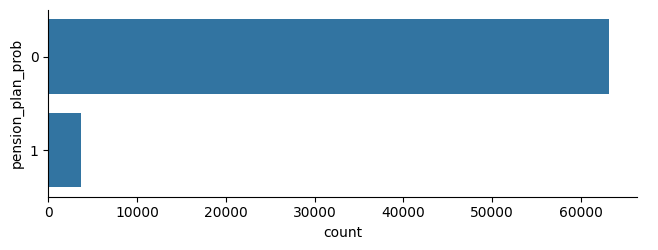

In [329]:
ax = sns.catplot(y="pension_plan_prob", kind="count", data=df_prediction, height=2.6, aspect=2.5, orient='h')

In [330]:
yes = round((df_prediction.loc[df_prediction['pension_plan_prob']== 1,'pension_plan_prob'].count()/df_prediction['pension_plan_prob'].count())*100)
no = round((df_prediction.loc[df_prediction['pension_plan_prob']== 0,'pension_plan_prob'].count()/df_prediction['pension_plan_prob'].count())*100)

In [331]:
print('The percentage of clients with the probability of obtaining pension_plan "Y" is {}% and the class "N" is {} %'.format(yes,no))

The percentage of clients with the probability of obtaining pension_plan "Y" is 5% and the class "N" is 95 %
